In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [3]:
fl = pd.read_csv('./data/Locations.txt', sep=' ')
fm = pd.read_csv('./data/Oregon_Met_Data.txt', sep=' ')
predictor = KernelDensity()
X1 = fl.as_matrix()
X2 = fm.as_matrix()

In [7]:
predictor.fit(X)
predictor.score_samples

dtype('float64')

In [14]:
X = np.array([1,2,3,4])
Y = np.array([1,1,2,2])
np.bincount(Y, weights=X)

array([ 0.,  3.,  7.])

In [30]:
meanY = np.bincount(fm.SID.as_matrix(), weights=fm.Tmin_deg_C.as_matrix())/np.bincount(fm.SID.as_matrix())
meanY = meanY[1:]
np.set_printoptions(suppress=True,precision=3)
meanY

array([  480.955,     2.75 ,     1.024,   252.083,     0.302,   990.797,
         698.867,    12.232,   108.986,  4178.72 ,   398.099,     3.993,
           5.098,   505.581,     5.312,    11.206,   337.088,    27.784,
          11.379,    81.851,    11.841,     5.461,  2083.946,    16.593,
        1003.046,     5.317,     6.77 ,   463.668,     6.641,    26.811,
          10.769,     6.405,    17.284,     2.965,    34.866,  2105.984,
         965.907,   288.837,   185.806,    81.211,  1201.14 ,  1281.949,
           9.351,    68.399,    29.571,     7.812,  1964.323,   202.679,
        1049.109,     6.036,  2502.788,   314.696,    23.226,   258.369,
          33.489,   175.397,    21.237,    12.293,     2.895,    -0.207,
          -2.161,     6.047,    24.824,     1.192,    34.162,    31.039,
          50.33 ,    45.699,    34.748,    -2.288,   141.283,   155.619,
          83.509,     4.712,   532.42 ,    -0.409,    64.144,     1.894,
          21.713,     7.665,    21.324,    19.842, 

In [31]:
np.bincount(fm.SID.as_matrix())

array([   0,  607, 1827, 1827, 1519, 1827, 1725, 1551, 1827, 1647,  819,
       1723, 1827, 1819, 1698, 1796, 1827, 1776, 1827, 1827, 1827, 1827,
       1827, 1505, 1827, 1490, 1827, 1827, 1724, 1827, 1827, 1827, 1827,
       1827, 1827, 1827, 1337, 1759, 1819, 1676, 1827, 1156, 1756, 1827,
       1827, 1827, 1827, 1090, 1186, 1772, 1827, 1326, 1419, 1827, 1817,
       1827, 1674, 1827, 1796, 1827, 1827, 1820, 1763, 1169, 1825, 1826,
       1780, 1721, 1763, 1775, 1688, 1682, 1736, 1046, 1826, 1156, 1826,
       1826, 1826, 1749, 1810, 1711, 1819,  634, 1825, 1825, 1764, 1757,
       1823, 1746, 1711, 1825, 1813, 1767, 1709, 1157,  236, 1824,  748,
       1824, 1797, 1053, 1823, 1825, 1735, 1735, 1735, 1733, 1735, 1735,
       1735, 1096,  346])

In [292]:

def mean_temperature(sid, fm=fm):
    possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
    X1 = fm.Time.as_matrix()[possible]
    X1 = X1.reshape((X1.size,1))
    Y1 = fm.Tmin_deg_C.as_matrix()[possible]
    days = np.arange(1, fm.Time.max()+1)
    days = days.reshape((days.size, 1))
    return np.mean(KernelRidge(kernel='rbf', gamma=-1).fit(X1, Y1).predict(days))
    

In [283]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression, Lasso

class GaussianDensity():
    def __init__(self, h=1, kernel=rbf_kernel, model=None):
        self.h = h
        self.kernel = kernel
        self.model = model or LinearRegression()
        self.X = None
        
    def fit(self, X, y):
        if len(X.shape) == 1:
            X = X.reshape(X.size, 1)
        self.X = X
        G = self.kernel(X, X, gamma=self.h)
        self.model.fit(G.T.dot(G)+np.eye(G.shape[1])*1e-9, G.T.dot(y))
        return self
    
    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(X.size, 1)
        G = self.kernel(X, self.X, gamma=self.h)
        return self.model.predict(G)

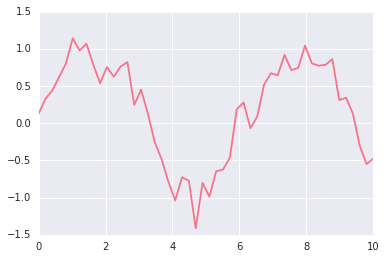

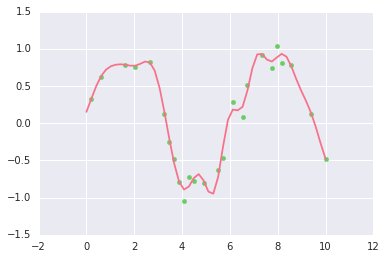

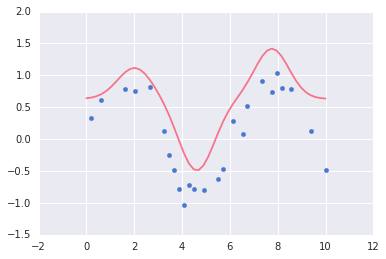

In [219]:
from sklearn.cross_validation import train_test_split
X = np.linspace(0, 10)
noise = np.random.normal(0, 0.2, X.size)
Y = np.sin(X)+noise
X = X.reshape(X.size, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
with sns.color_palette("husl", 8):
    plt.figure(1)
    plt.plot(X, Y)
    plt.figure(2)
    plt.plot(X, GaussianDensity().fit(X_train, y_train).predict(X))
    plt.scatter(X_train, y_train, color=p.pop())
    plt.figure(3)
    plt.plot(X, GaussianDensity(model=Lasso(alpha=0.1)).fit(X_train, y_train).predict(X))
    plt.scatter(X_train, y_train, color=p.pop())

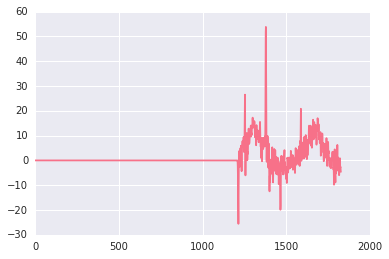

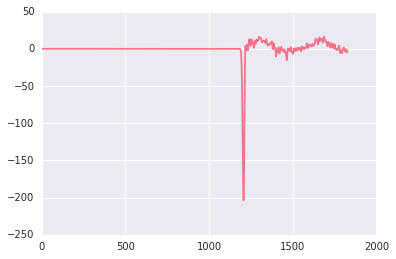

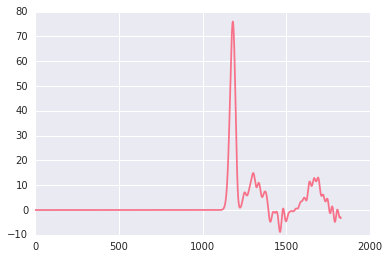

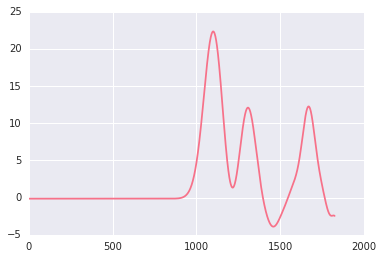

In [284]:
with sns.color_palette("husl", 8):
    for i in range(1,5):
        sid = 1
        possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
        X = fm.Time.as_matrix()[possible]
        Y = fm.Tmin_deg_C.as_matrix()[possible]
        years = np.arange(1, fm.Time.max()+1)
        z = GaussianDensity(h=1*10**(-i), model=).fit(X, Y).predict(years)
        plt.figure(i)
        plt.plot(z)

In [291]:
mean_temperature(1)

1.0627503012860753

gamma=0.100000, mean=0.993705
gamma=0.010000, mean=1.017600
gamma=0.001000, mean=1.026648
gamma=0.000100, mean=1.027698


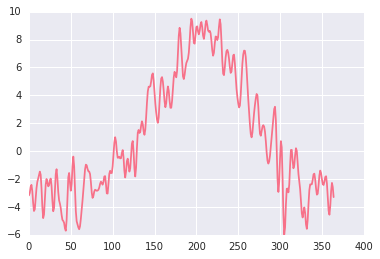

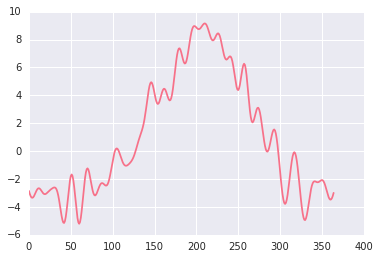

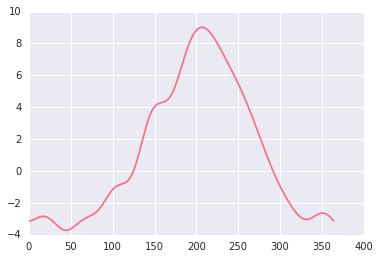

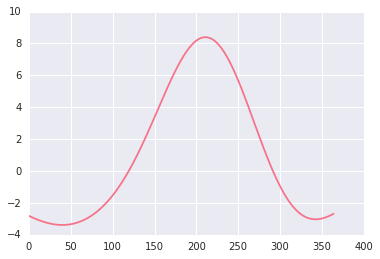

In [394]:
with sns.color_palette("husl", 8):
    for i in range(1,5):
        sid = 3
        possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
        X1 = fm.Time.as_matrix()[possible]%365
        X1 = X1.reshape((X1.size,1))
        
        Y1 = fm.Tmin_deg_C.as_matrix()[possible]
        years = np.arange(0, 365)
        years = years.reshape((years.size, 1))
        z = KernelRidge(kernel='rbf', gamma=10**(-i)).fit(X1, Y1).predict(years)
        plt.figure(i)
        plt.plot(z)
        print("gamma=%f, mean=%f"%(10**(-i), np.mean(z)))

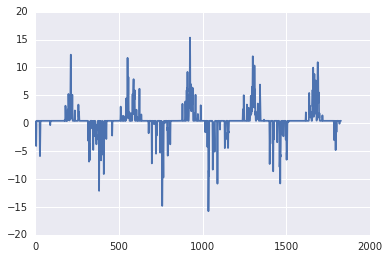

In [234]:
plt.plot(z)

In [397]:

def mean_temperature(sid, fm=fm):
    possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
    X = fm.Time.as_matrix()[possible]%365
    X = X.reshape((X.size,1))
    Y = fm.Tmin_deg_C.as_matrix()[possible]
    days = np.arange(0, 365)
    days = days.reshape((days.size, 1))
    return np.mean(KernelRidge(kernel='rbf', gamma=0.1).fit(X, Y).predict(days))
def mean_temperature2(sid, fm=fm):
    possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
    Y = fm.Tmin_deg_C.as_matrix()[possible]
    return np.mean(Y)
    

In [371]:
long, lat = np.meshgrid(
    np.linspace(fl.Longitude_DD.min(), fl.Longitude_DD.max(), 100),
    np.linspace(fl.Latitude_DD.min(), fl.Latitude_DD.max(), 100))
    
grid = np.vstack([long.ravel(), lat.ravel()]).T

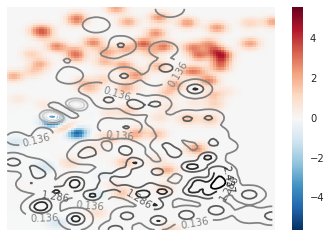

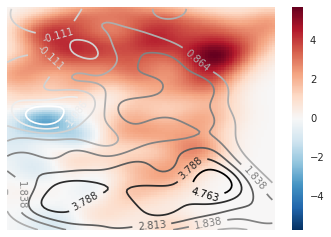

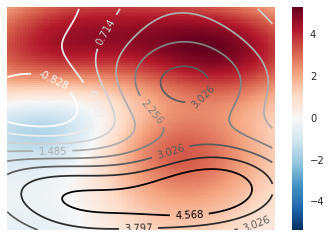

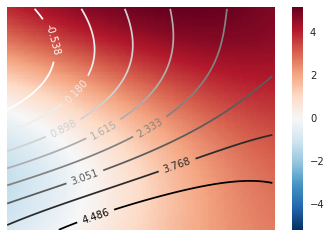

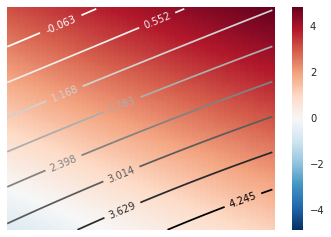

In [396]:
# temps = np.array([mean_temperature(i) for i in range(fm.SID.min(), fm.SID.max()+1)])
positions = np.vstack([fl.Longitude_DD.as_matrix(), fl.Latitude_DD.as_matrix()]).T

for i in range(1, 6):
    k = KernelRidge(kernel='rbf', gamma=10**(3-i)).fit(positions, temps)
    temresult = k.predict(grid).reshape((100, 100))
    plt.figure(i)
    sns.heatmap(temresult.T, xticklabels=False, yticklabels=False)
    cs = plt.contour(temresult.T, levels=np.linspace(np.min(temresult), np.max(temresult), 10)[1:-1])
    plt.clabel(cs, inline=1, fontsize=10)

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


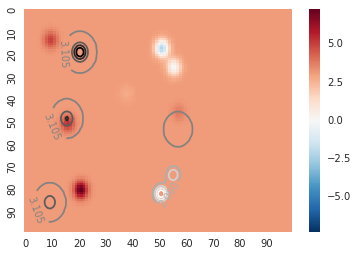

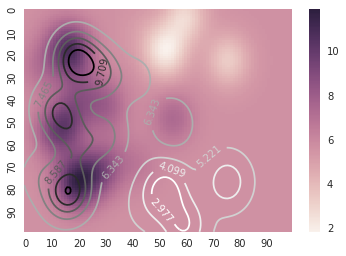

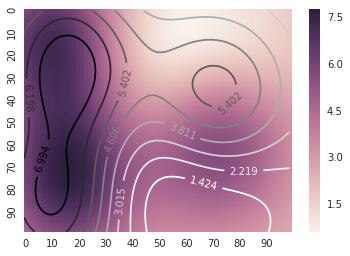

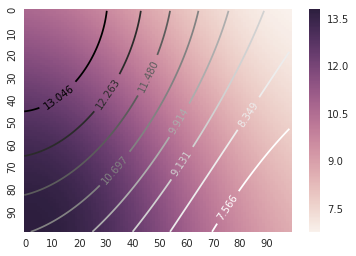

In [388]:
labelx = np.linspace(fl.Longitude_DD.min(), fl.Longitude_DD.max(), 10)
labely = np.linspace(fl.Latitude_DD.min(), fl.Latitude_DD.max(), 10)
for i in range(1, 5):
    k = GaussianDensity(h=10**(3-i), model=Lasso(alpha=0.1)).fit(positions, temps)
    temresult = k.predict(grid).reshape((100, 100))
    plt.figure(i)
    sns.heatmap(temresult, xticklabels=10, yticklabels=10)
    cs = plt.contour(temresult, levels=np.linspace(np.min(temresult), np.max(temresult), 10)[1:-1])
    plt.clabel(cs, inline=1, fontsize=10)